```@meta
CurrentModule = BayesLaplace
```

# Bayesian MLP

In [149]:
# Import libraries.
using Flux, Plots, Random, PlotThemes, Statistics, BayesLaplace
theme(:juno)
using Logging
disable_logging(Logging.Info)

LogLevel(1)

In [150]:
# Number of points to generate.
xs, y = toy_data_non_linear(200)
X = hcat(xs...); # bring into tabular format

In [151]:
n_hidden = 32
D = size(X)[1]
nn = Chain(
    Dense(D, n_hidden, σ),
    Dense(n_hidden, 1)
)  

Chain(
  Dense(2, 32, σ),                      # 96 parameters
  Dense(32, 1),                         # 33 parameters
)                   # Total: 4 arrays, 129 parameters, 772 bytes.

In [152]:
λ = 0.01

0.01

In [153]:
sqnorm(x) = sum(abs2, x)
weight_regularization(λ=λ) = 1/2 * λ^2 * sum(sqnorm, Flux.params(nn))

loss(x, y) = Flux.Losses.logitbinarycrossentropy(nn(x), y) + weight_regularization()
ps = Flux.params(nn)
data = zip(xs,y);

Plots.AnimatedGif("/Users/FA31DU/Library/CloudStorage/OneDrive-DelftUniversityofTechnology/git/BayesLaplace.jl/docs/src/www/nn_training_mlp.gif")
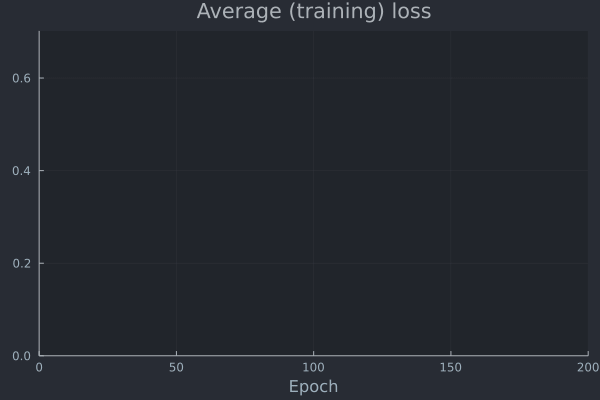

In [154]:
using Flux.Optimise: update!, ADAM
opt = ADAM()
epochs = 200
avg_loss(data) = mean(map(d -> loss(d[1],d[2]), data))

using Plots
anim = Animation()
plt = plot(ylim=(0,avg_loss(data)), xlim=(0,epochs), legend=false, xlab="Epoch")
avg_l = []

for epoch = 1:epochs
  for d in data
    gs = gradient(params(nn)) do
      l = loss(d...)
    end
    update!(opt, params(nn), gs)
  end
  avg_l = vcat(avg_l,avg_loss(data))
  plot!(plt, avg_l, color=1, title="Average (training) loss")
  frame(anim, plt)
end

gif(anim, "www/nn_training_mlp.gif")

## Laplace appoximation

In [155]:
la = laplace(nn, λ=λ, subset_of_weights=:last_layer)
fit!(la, data);
zoom=0
p_plugin = plot_contour(X',y,la;title="Plugin",type=:plugin,zoom=zoom);
p_laplace = plot_contour(X',y,la;title="Laplace",zoom=zoom);

In [156]:
# Plot the posterior distribution with a contour plot.
plt = plot(p_plugin, p_laplace, layout=(1,2), size=(1000,400))
savefig(plt, "www/posterior_predictive_mlp.png")

![](www/posterior_predictive_mlp.png)

In [159]:
zoom=-50
p_plugin = plot_contour(X',y,la;title="Plugin",type=:plugin,zoom=zoom);
p_laplace = plot_contour(X',y,la;title="Laplace",zoom=zoom);
# Plot the posterior distribution with a contour plot.
plt = plot(p_plugin, p_laplace, layout=(1,2), size=(1000,400))
savefig(plt, "www/posterior_predictive_mlp_zoomed.png");

![](www/posterior_predictive_mlp_zoomed.png)